<a href="https://colab.research.google.com/github/FerdousJUST/Image-Classification-in-CNN/blob/main/Four_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imageio
import pathlib
%matplotlib inline


In [2]:
import tensorflow as tf
tf.test.gpu_device_name()


''

In [3]:
from keras.preprocessing.image import ImageDataGenerator
rescaled = ImageDataGenerator(1/255)
train_fed = rescaled.flow_from_directory('/content/drive/MyDrive/Multiple Fish Classification 2022/Fish Images',target_size=(128,128),batch_size=32,class_mode= 'categorical')
test_fed = rescaled.flow_from_directory('/content/drive/MyDrive/Multiple Fish Classification 2022/Test Data',target_size=(128,128),batch_size=32,class_mode= 'categorical')

Found 800 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [4]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential






model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,kernel_size=(3,3),activation = 'relu',input_shape = (128,128,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(128,activation = 'relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(4,activation = 'softmax')
                                    ])



In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [6]:
from tensorflow.keras.optimizers import Adam
model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])

In [7]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
import h5py

In [8]:
erl_stop = EarlyStopping(monitor = 'val_loss',patience = 3,restore_best_weights=True)
mod_chk = ModelCheckpoint(filepath='/content/drive/MyDrive/Multiple Fish Classification 2022/my_model.hdf5',monitor = 'val_loss',save_best_only = True)
lr_rate = ReduceLROnPlateau(monitor = 'val_loss',patience = 2,factor = 0.1)

In [9]:
hist = model.fit_generator(train_fed, shuffle = True, epochs=5, validation_data=test_fed,
                           callbacks = [erl_stop,mod_chk,lr_rate],verbose = 2
                           )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  
/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5
25/25 - 584s - loss: 5.6999 - accuracy: 0.3450 - val_loss: 0.9308 - val_accuracy: 0.5625 - lr: 0.0010 - 584s/epoch - 23s/step
Epoch 2/5
25/25 - 22s - loss: 0.9847 - accuracy: 0.5425 - val_loss: 0.8185 - val_accuracy: 0.6525 - lr: 0.0010 - 22s/epoch - 899ms/step
Epoch 3/5
25/25 - 22s - loss: 0.8401 - accuracy: 0.6250 - val_loss: 0.5634 - val_accuracy: 0.7925 - lr: 0.0010 - 22s/epoch - 892ms/step
Epoch 4/5
25/25 - 22s - loss: 0.6851 - accuracy: 0.7050 - val_loss: 0.4137 - val_accuracy: 0.8175 - lr: 0.0010 - 22s/epoch - 888ms/step
Epoch 5/5
25/25 - 22s - loss: 0.5763 - accuracy: 0.7675 - val_loss: 0.3945 - val_accuracy: 0.8750 - lr: 0.0010 - 22s/epoch - 890ms/step


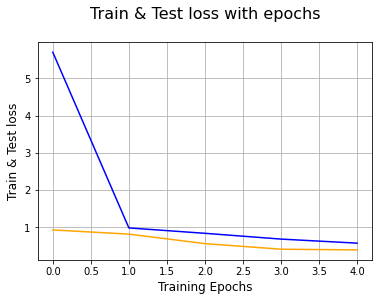

In [10]:
plt.plot(hist.history['loss'],color = 'blue',label = 'train')
plt.plot(hist.history['val_loss'],color = 'orange',label = 'train')
plt.grid(True)
plt.title("Train & Test loss with epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 12)
plt.ylabel("Train & Test loss",fontsize =12)
plt.show()

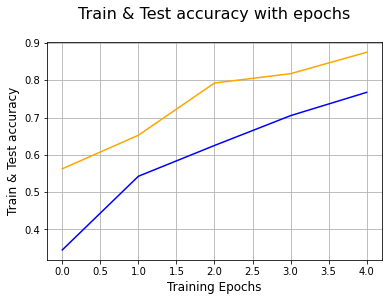

In [11]:
plt.plot(hist.history['accuracy'],color = 'blue',label = 'train')
plt.plot(hist.history['val_accuracy'],color = 'orange',label = 'train')
plt.grid(True)
plt.title("Train & Test accuracy with epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 12)
plt.ylabel("Train & Test accuracy",fontsize =12)
plt.show()

In [12]:
acc = model.evaluate(test_fed,steps = len(test_fed),verbose = 2)
print('%.2f'%(acc[1]*100))

13/13 - 5s - loss: 0.3945 - accuracy: 0.8750 - 5s/epoch - 383ms/step
87.50
